Features seleccionadas: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']
✅ RMSE: 13.279
✅ R² Score: 0.800
📊 R² promedio CV: 0.792 ± 0.010


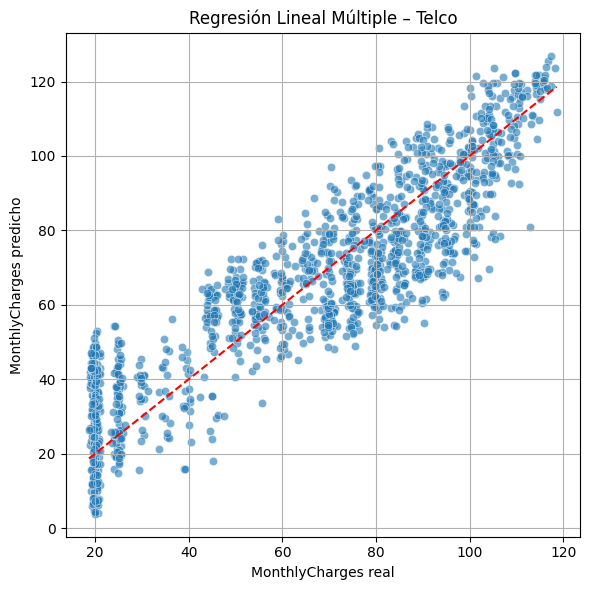

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("teleco_clean.csv")

target = 'MonthlyCharges'
y = df[target]
X = df.drop(columns=[target, 'Churn']) 


#Eliminar outliers solo en variables numéricas relevantes
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

y = df[target]
X = df.drop(columns=[target, 'Churn'])

scaler = StandardScaler()
X[['tenure', 'TotalCharges']] = scaler.fit_transform(X[['tenure', 'TotalCharges']])

#Selección de las mejores características
selector = SelectKBest(score_func=f_regression, k=15)
X_sel = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Features seleccionadas:", selected_features.tolist())

X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"✅ RMSE: {rmse:.3f}")
print(f"✅ R² Score: {r2:.3f}")

cv_scores = cross_val_score(model, X_sel, y, cv=5, scoring='r2')
print(f"📊 R² promedio CV: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("MonthlyCharges real")
plt.ylabel("MonthlyCharges predicho")
plt.title("Regresión Lineal Múltiple – Telco")
plt.grid(True)
plt.tight_layout()
plt.show()
